Dataset description page: https://archive.ics.uci.edu/ml/datasets/Facebook+Comment+Volume+Dataset

In [ ]:
# Loading the dataset(zipped) with a google drive id
! gdown 1ak_rxZ1XrenunEZK62t9U61XYe8mp-EU

# Unzipping the dataset to a folder named "unzipped_data". The directory can be found by clicking on the Files icon on the leftmost column
# The command automatically checks for existence of unzipped data so re-running it does not lead to multiple unzips
# However, running it for the first time will generate a bunch of checker prints. To remove them for simplicity, simply re-run this cell
!unzip -u "/content/Dataset.zip" -d "/content/unzipped_data"

Downloading...
From: https://drive.google.com/uc?id=1ak_rxZ1XrenunEZK62t9U61XYe8mp-EU
To: /content/Dataset.zip
100% 19.1M/19.1M [00:00<00:00, 29.5MB/s]
Archive:  /content/Dataset.zip
   creating: /content/unzipped_data/Dataset/
  inflating: /content/unzipped_data/Dataset/.DS_Store  
   creating: /content/unzipped_data/__MACOSX/
   creating: /content/unzipped_data/__MACOSX/Dataset/
  inflating: /content/unzipped_data/__MACOSX/Dataset/._.DS_Store  
  inflating: /content/unzipped_data/Dataset/Catagory_File - Feature 4.pdf  
  inflating: /content/unzipped_data/__MACOSX/Dataset/._Catagory_File - Feature 4.pdf  
   creating: /content/unzipped_data/Dataset/Testing/
  inflating: /content/unzipped_data/Dataset/Testing/.DS_Store  
   creating: /content/unzipped_data/__MACOSX/Dataset/Testing/
  inflating: /content/unzipped_data/__MACOSX/Dataset/Testing/._.DS_Store  
  inflating: /content/unzipped_data/Dataset/Testing/Features_TestSet.csv  
  inflating: /content/unzipped_data/__MACOSX/Dataset/Test

**Importing all the training datasets:**

In [ ]:
import pandas as pd
import numpy as np
import sklearn.preprocessing
import seaborn as sn
import matplotlib.pyplot as plt
df1 = pd.read_csv("/content/unzipped_data/Dataset/Training/Features_Variant_1.csv", header = None)

In [ ]:
test = pd.read_csv("/content/unzipped_data/Dataset/Testing/Features_TestSet.csv", header = None)
test_target = test.iloc[:, 53]
test_data = test.iloc[:, :53]

**'target' is the 54th column of each training dataset. 'data' is the training features without target**


In [ ]:
df1_target = df1.iloc[:, 53]
df1_data = df1.iloc[:, :53]

**'stats' is after dropping the statistical data between col 4-29**

In [ ]:
df1_stats = df1_data.drop(df1_data.iloc[:, 4:29], axis = 1)

**Fitting the OLS estimate with all the columns, including 4-29**

In [ ]:
from statsmodels.api import OLS
OLS(df1_target,df1_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     53   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     410.7
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:46:39   Log-Likelihood:            -1.9621e+05
No. Observations:               40949   AIC:                         3.925e+05
Df Residuals:                   40900   BIC:                         3.929e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0           2.323e-08   2.87e-08      0.810      0.418    -3.3e-08    7.94e-08
1          -1.268e-05   7.57e-06     -1.675      0.094   -2.75e-05    2.16e-06
2           -1.93e-05   2.27e-06     -8.499      0.000   -2.37e-05   -1.48e-05
3             -0.0101      0.008     -1.318      0.188      -0.025       0.005
4             -0.5684      0.122     -4.661      0.000      -0.807      -0.329
5              0.0144      0.006      2.319      0.020       0.002       0.027
6              0.9640      0.123      7.866      0.000       0.724       1.204
7              0.1328      0.059      2.263      0.024       0.018       0.248
8             -0.1608      0.083     -1.944      0.052      -0.323       0.001
9             -0.1170      0.042     -2.810      0.005      -0.199      -0.035
10            -0.0038      0.006     -0.636      0.525      -0.015       0.008
11             0.1729      0.042      4.100      0.000       0.090       0.256
12             0.1307      0.033      3.933      0.000       0.066       0.196
13            -0.0324      0.040     -0.811      0.417      -0.111       0.046
14             0.1116      0.114      0.979      0.328      -0.112       0.335
15             0.0120      0.004      2.990      0.003       0.004       0.020
16             0.1487      0.039      3.776      0.000       0.072       0.226
17            -0.0250      0.040     -0.620      0.535      -0.104       0.054
18            -0.1406      0.035     -3.995      0.000      -0.210      -0.072
19             0.5264      0.134      3.924      0.000       0.263       0.789
20            -0.0164      0.007     -2.522      0.012      -0.029      -0.004
21            -1.0464      0.126     -8.293      0.000      -1.294      -0.799
22            -0.1495      0.059     -2.541      0.011      -0.265      -0.034
23             0.2144      0.087      2.455      0.014       0.043       0.386
24             0.0009      0.004      0.250      0.803      -0.006       0.008
25             0.0022      0.005      0.409      0.683      -0.008       0.013
26             0.0242      0.023      1.045      0.296      -0.021       0.070
27            -0.0323      0.027     -1.203      0.229      -0.085       0.020
28             0.0097      0.024      0.406      0.684      -0.037       0.057
29             0.0442      0.016      2.697      0.007       0.012       0.076
30             0.1389      0.003     42.890      0.000       0.133       0.145
31             0.0582      0.003     18.415      0.000       0.052       0.064
32            -0.0683      0.018     -3.739      0.000      -0.104      -0.032
33             0.0808      0.001     67.421      0.000       0.078       0.083
34            -0.1924      0.007    -25.972      0.000      -0.207      -0.178
35         -3.277e-05      0.000     -0.085      0.932      -0.001       0.001
36

**Analysing the accuracy of OLS with all columns:**

In [ ]:
from sklearn.metrics import mean_squared_error
ols_full = OLS(df1_target,df1_data).fit()
ypred = ols_full.predict(df1_data)
mse = mean_squared_error(df1_target, ypred)
print(mse)

850.0873087903733


**Fitting the OLS estimate with columns 4-29 removed:**

In [ ]:
OLS(df1_target,df1_stats).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     53   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     731.7
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:46:39   Log-Likelihood:            -1.9696e+05
No. Observations:               40949   AIC:                         3.940e+05
Df Residuals:                   40924   BIC:                         3.942e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0          -1.452e-07   2.82e-08     -5.148      0.000      -2e-07   -8.99e-08
1          -2.482e-05   7.27e-06     -3.413      0.001   -3.91e-05   -1.06e-05
2           1.762e-05   1.93e-06      9.147      0.000    1.38e-05    2.14e-05
3             -0.0337      0.008     -4.491      0.000      -0.048      -0.019
29             0.1671      0.015     10.803      0.000       0.137       0.197
30             0.1515      0.003     47.080      0.000       0.145       0.158
31             0.0658      0.003     20.894      0.000       0.060       0.072
32            -0.1798      0.017    -10.392      0.000      -0.214      -0.146
33             0.0857      0.001     71.969      0.000       0.083       0.088
34            -0.1984      0.008    -26.357      0.000      -0.213      -0.184
35             0.0003      0.000      0.777      0.437      -0.000       0.001
36             0.0016      0.000      9.174      0.000       0.001       0.002
37          4.316e-16   1.33e-15      0.325      0.745   -2.17e-15    3.03e-15
38             0.3859      0.080      4.850      0.000       0.230       0.542
39            -0.3052      1.067     -0.286      0.775      -2.396       1.786
40            -0.2192      1.057     -0.207      0.836      -2.292       1.853
41            -0.2176      1.037     -0.210      0.834      -2.249       1.814
42             0.8363      1.003      0.834      0.404      -1.129       2.801
43             0.8454      1.081      0.782      0.434      -1.274       2.965
44             0.9814      1.069      0.918      0.358      -1.113       3.076
45            -0.1129      1.065     -0.106      0.916      -2.200       1.974
46            -0.2760      1.057     -0.261      0.794      -2.348       1.796
47             0.7313      1.067      0.685      0.493      -1.361       2.823
48             0.1567      1.069      0.147      0.883      -1.938       2.251
49             1.1221      1.078      1.041      0.298      -0.990       3.235
50             0.1227      1.036      0.118      0.906      -1.909       2.154
51             0.3503      1.009      0.347      0.728      -1.627       2.328
52            -0.3989      1.060     -0.376      0.707      -2.477       1.679
==============================================================================
Omnibus:                    80909.166   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        299292619.067
Skew:                          15.863   Prob(JB):                         0.00
Kurtosis:                     420.621   Cond. No.                     1.00e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.95e-14. This might indicate

In [ ]:
ols_stats = OLS(df1_target,df1_stats).fit()
ypred_stats = ols_stats.predict(df1_stats)
mse_stats = mean_squared_error(df1_target, ypred_stats)
print(mse_stats)

881.5643017301022


**Correlation matrix for all 53 columns and the related visualization:**

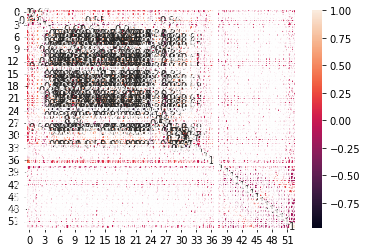

In [ ]:
corrMatrix1 = df1_data.corr()
sn.heatmap(corrMatrix1, annot=True)
from numpy import asarray
from numpy import savetxt
savetxt('corrMatrix1.csv', corrMatrix1, delimiter=',')
#plt.show()
#print(corrMatrix1)

**Correlation Matrix with col 4-29 removed and related visualisation:**

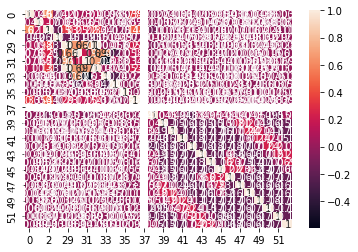

          0         1         2         3         29        30        31  \
0   1.000000  0.044839  0.623436 -0.042167  0.105624  0.077773  0.071448   
1   0.044839  1.000000  0.166850 -0.060181  0.098352  0.061610  0.064703   
2   0.623436  0.166850  1.000000 -0.148685  0.329139  0.251529  0.217939   
3  -0.042167 -0.060181 -0.148685  1.000000 -0.145932 -0.103961 -0.094728   
29  0.105624  0.098352  0.329139 -0.145932  1.000000  0.657492  0.713641   
30  0.077773  0.061610  0.251529 -0.103961  0.657492  1.000000  0.193922   
31  0.071448  0.064703  0.217939 -0.094728  0.713641  0.193922  1.000000   
32  0.104064  0.101214  0.329399 -0.148661  0.996736  0.689478  0.699315   
33  0.009764  0.001620  0.041487 -0.013638 -0.000170  0.672384 -0.595761   
34 -0.005717  0.004760 -0.024592  0.003876  0.055679 -0.211857  0.087907   
35 -0.003509 -0.005189 -0.011251  0.037214 -0.005036 -0.005820 -0.003411   
36  0.331114  0.052569  0.443296 -0.028564  0.225711  0.170726  0.151366   
37       NaN

In [ ]:
corrMatrix2 = df1_stats.corr()
sn.heatmap(corrMatrix2, annot = True)
plt.show()
print(corrMatrix2)

In [ ]:
cols_to_norm = [i for i in range(37)]

def norm(df):
  df_norm = sklearn.preprocessing.normalize(df.loc[:, cols_to_norm], norm = 'l1', axis = 0, copy = True)
  df_norm = pd.concat([pd.DataFrame(df_norm), df.loc[:, 37]], axis = 1)
  col38 = pd.DataFrame(sklearn.preprocessing.normalize(pd.Series(df.loc[:, 38]).array.reshape(-1, 1), norm = 'l2', axis = 0, copy = True)).rename(columns= {0:38})
  df_norm = pd.concat([df_norm, col38], axis = 1)
  df_norm = pd.concat([df_norm, df.loc[:, 39:53]], axis = 1)
  return df_norm
# dfX_norm stands for normalized dataframe with stats
df1_norm = norm(df1_data)
# df2_norm = norm(df2)
# df3_norm = norm(df3)
# df4_norm = norm(df4)
# df5_norm = norm(df5)

In [ ]:
print(df1_data)
print(df1_norm)

            0   1       2   3    4       5           6      7           8   \
0       634995   0     463   1  0.0   806.0   11.291045    1.0   70.495138   
1       634995   0     463   1  0.0   806.0   11.291045    1.0   70.495138   
2       634995   0     463   1  0.0   806.0   11.291045    1.0   70.495138   
3       634995   0     463   1  0.0   806.0   11.291045    1.0   70.495138   
4       634995   0     463   1  0.0   806.0   11.291045    1.0   70.495138   
...        ...  ..     ...  ..  ...     ...         ...    ...         ...   
40944  7170111  70  497000   9  0.0  1881.0  497.200000  269.0  502.318385   
40945  7170111  70  497000   9  0.0  1881.0  497.200000  269.0  502.318385   
40946  7170111  70  497000   9  0.0  1881.0  497.200000  269.0  502.318385   
40947  7170111  70  497000   9  0.0  1881.0  497.200000  269.0  502.318385   
40948  7170111  70  497000   9  0.0  1881.0  497.200000  269.0  502.318385   

        9   ...  43  44  45  46  47  48  49  50  51  52  
0    

In [ ]:
ols_norm = OLS(df1_target,df1_norm).fit()
ypred_norm = ols_norm.predict(df1_norm)
mse_norm = mean_squared_error(df1_target, ypred_norm)
print(mse_norm)

850.0873087903733


In [ ]:
df1_norm

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0.000012,0.000000e+00,2.523813e-07,0.000001,0.0,0.000044,0.000005,6.850962e-07,0.000026,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.000012,0.000000e+00,2.523813e-07,0.000001,0.0,0.000044,0.000005,6.850962e-07,0.000026,0.0,...,1,0,0,0,0,0,0,0,1,0
2,0.000012,0.000000e+00,2.523813e-07,0.000001,0.0,0.000044,0.000005,6.850962e-07,0.000026,0.0,...,0,1,0,0,0,0,0,0,0,1
3,0.000012,0.000000e+00,2.523813e-07,0.000001,0.0,0.000044,0.000005,6.850962e-07,0.000026,0.0,...,0,1,0,0,1,0,0,0,0,0
4,0.000012,0.000000e+00,2.523813e-07,0.000001,0.0,0.000044,0.000005,6.850962e-07,0.000026,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,0.000133,3.655677e-07,2.709147e-04,0.000009,0.0,0.000104,0.000218,1.842909e-04,0.000182,0.0,...,0,0,0,0,0,0,0,0,1,0
40945,0.000133,3.655677e-07,2.709147e-04,0.000009,0.0,0.000104,0.000218,1.842909e-04,0.000182,0.0,...,0,0,0,0,0,0,0,0,1,0
40946,0.000133,3.655677e-07,2.709147e-04,0.000009,0.0,0.000104,0.000218,1.842909e-04,0.000182,0.0,...,0,0,0,0,0,0,0,1,0,0
40947,0.000133,3.655677e-07,2.709147e-04,0.000009,0.0,0.000104,0.000218,1.842909e-04,0.000182,0.0,...,0,0,0,0,0,0,0,0,1,0


preliminary use of PCA to
 reduce the dimension

In [ ]:
from sklearn.decomposition import PCA
pca_df1 = PCA(n_components=12) # target number of dimensions
pca_df1_data = pca_df1.fit_transform(df1_norm)

In [ ]:
# PCA reduces the dimension from 53 to 12
print(df1_norm.shape)
print(pca_df1_data.shape)

(40949, 53)
(40949, 12)


In [ ]:
print('Explained variation per principal component: {}'.format(pca_df1.explained_variance_ratio_))
print('Sum of explained variation by 12 components:', pca_df1.explained_variance_ratio_.sum())

Explained variation per principal component: [0.14341711 0.13699307 0.0957156  0.09331822 0.09055061 0.0874938
 0.07788545 0.07645691 0.07257904 0.07169717 0.02760928 0.02628036]
Sum of explained variation by 12 components: 0.9999966288795599


It seems that while projecting our original 53-dimensional data to a 12-dimensional data, most of the information was preserved.

In [ ]:
principal_df1_Df = pd.DataFrame(data = pca_df1_data)

In [ ]:
principal_df1_Df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11
40944,-0.257472,0.751499,0.422444,0.119614,-0.207849,0.710806,0.402991,0.073800,-0.212335,-0.276399,0.067415,0.133435
40945,-0.257472,0.751499,0.422444,0.119615,-0.207849,0.710806,0.402990,0.073800,-0.212335,-0.276399,0.067415,0.133435
40946,-0.553953,0.588088,0.858719,-0.157819,0.253906,-0.235094,0.160147,-0.034574,-0.035387,0.282816,-0.123060,-0.109704
40947,-0.257472,0.751499,0.422443,0.119615,-0.207849,0.710805,0.402990,0.073800,-0.212335,-0.276399,0.067415,0.133435
40948,-0.257472,0.751499,0.422443,0.119615,-0.207849,0.710805,0.402990,0.073800,-0.212335,-0.276399,0.067415,0.133435
